# Pre-requisites for Tensorflow 2.0 and other imports


In [ ]:
# prerequisites for working with Tensorflow 2.0 
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import pandas as pd
import seaborn as sn 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [ ]:
!nvidia-smi

Thu Dec 12 09:40:30 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.36       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [ ]:
# To get data from gitlab
#!git clone https://<username>:<password>@gitlab.com/<project>
#!git clone https://<>:<>@gitlab.com/bhavanak93/master_thesis_dataset.git

Cloning into 'master_thesis_dataset'...
remote: Enumerating objects: 172, done.
remote: Counting objects: 100% (172/172), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 172 (delta 142), reused 172 (delta 142)
Receiving objects: 100% (172/172), 13.80 MiB | 5.69 MiB/s, done.
Resolving deltas: 100% (142/142), done.


# Data preparation


In [ ]:
# Data Preparation -> Room temperature data only

path_rt = "master_thesis_dataset/allValves/"

# use 450 readings of RT
rt_cols = [i for i in range(1,102)]

df_2103_rt = pd.read_csv(path_rt + '1021-03_500readings_100sPause.csv', index_col=0, usecols=rt_cols) 
df_2105_rt = pd.read_csv(path_rt + '1021-05_500readings_100sPause.csv', index_col=0, usecols=rt_cols)
df_2115_rt = pd.read_csv(path_rt + '1021-15_500readings_100sPause.csv', index_col=0, usecols=rt_cols)
df_2117_rt = pd.read_csv(path_rt + '1021-17_500readings_100sPause.csv', index_col=0, usecols=rt_cols)
df_2007_rt = pd.read_csv(path_rt + '1020-07_500readings_100sPause.csv', index_col=0, usecols=rt_cols)
df_2010_rt = pd.read_csv(path_rt + '1020-10_500readings_100sPause.csv', index_col=0, usecols=rt_cols)
df_2016_rt = pd.read_csv(path_rt + '1020-16_500readings_100sPause.csv', index_col=0, usecols=rt_cols)
df_2017_rt = pd.read_csv(path_rt + '1020-17_500readings_100sPause.csv', index_col=0, usecols=rt_cols)
df_2021_rt = pd.read_csv(path_rt + '1020-21_500readings_100sPause.csv', index_col=0, usecols=rt_cols)
df_2008_rt = pd.read_csv(path_rt + '1020-08_500readings_100sPause.csv', index_col=0, usecols=rt_cols)
df_2009_rt = pd.read_csv(path_rt + '1020-09_500readings_100sPause.csv', index_col=0, usecols=rt_cols)

In [ ]:
# Data Preparation -> Temperature data of 5 temperature values : 5def, 15 deg, 25deg, 35deg, 45deg

path_temp = "master_thesis_dataset/tempData/"

# use 50 readings of each temperature 
temp_cols = [i for i in range(1,102)]

# for 5degrees :
df_2103_05deg = pd.read_csv(path_temp + '1021-03_05deg_100readings_withPause.csv', index_col=0, usecols=temp_cols) 
df_2105_05deg = pd.read_csv(path_temp + '1021-05_05deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2115_05deg = pd.read_csv(path_temp + '1021-15_05deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2117_05deg = pd.read_csv(path_temp + '1021-17_05deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2007_05deg = pd.read_csv(path_temp + '1020-07_05deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2010_05deg = pd.read_csv(path_temp + '1020-10_05deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2016_05deg = pd.read_csv(path_temp + '1020-16_05deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2017_05deg = pd.read_csv(path_temp + '1020-17_05deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2021_05deg = pd.read_csv(path_temp + '1020-21_05deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2008_05deg = pd.read_csv(path_temp + '1020-08_05deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2009_05deg = pd.read_csv(path_temp + '1020-09_05deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)

# for 15degrees :
df_2103_15deg = pd.read_csv(path_temp + '1021-03_15deg_100readings_withPause.csv', index_col=0, usecols=temp_cols) 
df_2105_15deg = pd.read_csv(path_temp + '1021-05_15deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2115_15deg = pd.read_csv(path_temp + '1021-15_15deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2117_15deg = pd.read_csv(path_temp + '1021-17_15deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2007_15deg = pd.read_csv(path_temp + '1020-07_15deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2010_15deg = pd.read_csv(path_temp + '1020-10_15deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2016_15deg = pd.read_csv(path_temp + '1020-16_15deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2017_15deg = pd.read_csv(path_temp + '1020-17_15deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2021_15deg = pd.read_csv(path_temp + '1020-21_15deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2008_15deg = pd.read_csv(path_temp + '1020-08_15deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2009_15deg = pd.read_csv(path_temp + '1020-09_15deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)

# for 25degrees :
df_2103_25deg = pd.read_csv(path_temp + '1021-03_25deg_100readings_withPause.csv', index_col=0, usecols=temp_cols) 
df_2105_25deg = pd.read_csv(path_temp + '1021-05_25deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2115_25deg = pd.read_csv(path_temp + '1021-15_25deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2117_25deg = pd.read_csv(path_temp + '1021-17_25deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2007_25deg = pd.read_csv(path_temp + '1020-07_25deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2010_25deg = pd.read_csv(path_temp + '1020-10_25deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2016_25deg = pd.read_csv(path_temp + '1020-16_25deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2017_25deg = pd.read_csv(path_temp + '1020-17_25deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2021_25deg = pd.read_csv(path_temp + '1020-21_25deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2008_25deg = pd.read_csv(path_temp + '1020-08_25deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2009_25deg = pd.read_csv(path_temp + '1020-09_25deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)

# for 35degrees :
df_2103_35deg = pd.read_csv(path_temp + '1021-03_35deg_100readings_withPause.csv', index_col=0, usecols=temp_cols) 
df_2105_35deg = pd.read_csv(path_temp + '1021-05_35deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2115_35deg = pd.read_csv(path_temp + '1021-15_35deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2117_35deg = pd.read_csv(path_temp + '1021-17_35deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2007_35deg = pd.read_csv(path_temp + '1020-07_35deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2010_35deg = pd.read_csv(path_temp + '1020-10_35deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2016_35deg = pd.read_csv(path_temp + '1020-16_35deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2017_35deg = pd.read_csv(path_temp + '1020-17_35deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2021_35deg = pd.read_csv(path_temp + '1020-21_35deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2008_35deg = pd.read_csv(path_temp + '1020-08_35deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2009_35deg = pd.read_csv(path_temp + '1020-09_35deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)

# for 45degrees :
df_2103_45deg = pd.read_csv(path_temp + '1021-03_45deg_100readings_withPause.csv', index_col=0, usecols=temp_cols) 
df_2105_45deg = pd.read_csv(path_temp + '1021-05_45deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2115_45deg = pd.read_csv(path_temp + '1021-15_45deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2117_45deg = pd.read_csv(path_temp + '1021-17_45deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2007_45deg = pd.read_csv(path_temp + '1020-07_45deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2010_45deg = pd.read_csv(path_temp + '1020-10_45deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2016_45deg = pd.read_csv(path_temp + '1020-16_45deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2017_45deg = pd.read_csv(path_temp + '1020-17_45deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2021_45deg = pd.read_csv(path_temp + '1020-21_45deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2008_45deg = pd.read_csv(path_temp + '1020-08_45deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)
df_2009_45deg = pd.read_csv(path_temp + '1020-09_45deg_100readings_withPause.csv', index_col=0, usecols=temp_cols)

In [ ]:
# Data Preparation -> Pressure data of 4 Pressure values : 
# 1bar, 2bar, 3bar, 4bar for upto 4bar valbves and 
# 1bar, 2bar, 4bar, 6bar for upto 8bar valves 

path_pressure = "master_thesis_dataset/pressureData/" 

# use 50 readings of each pressure value 
temp_cols = [i for i in range(1,102)]

# for 1bar :
df_2103_1bar = pd.read_csv(path_pressure + '1021-03_1bar_100readings.csv', index_col=0, usecols=temp_cols) 
df_2105_1bar = pd.read_csv(path_pressure + '1021-05_1bar_100readings.csv', index_col=0, usecols=temp_cols)
df_2115_1bar = pd.read_csv(path_pressure + '1021-15_1bar_100readings.csv', index_col=0, usecols=temp_cols)
df_2117_1bar = pd.read_csv(path_pressure + '1021-17_1bar_100readings.csv', index_col=0, usecols=temp_cols)
df_2007_1bar = pd.read_csv(path_pressure + '1020-07_1bar_100readings.csv', index_col=0, usecols=temp_cols)
df_2010_1bar = pd.read_csv(path_pressure + '1020-10_1bar_100readings.csv', index_col=0, usecols=temp_cols)
df_2016_1bar = pd.read_csv(path_pressure + '1020-16_1bar_100readings.csv', index_col=0, usecols=temp_cols)
df_2017_1bar = pd.read_csv(path_pressure + '1020-17_1bar_100readings.csv', index_col=0, usecols=temp_cols)
df_2021_1bar = pd.read_csv(path_pressure + '1020-21_1bar_100readings.csv', index_col=0, usecols=temp_cols)
df_2008_1bar = pd.read_csv(path_pressure + '1020-08_1bar_100readings.csv', index_col=0, usecols=temp_cols)
df_2009_1bar = pd.read_csv(path_pressure + '1020-09_1bar_100readings.csv', index_col=0, usecols=temp_cols)

# for 2 bar :
df_2103_2bar = pd.read_csv(path_pressure + '1021-03_2bar_100readings.csv', index_col=0, usecols=temp_cols) 
df_2105_2bar = pd.read_csv(path_pressure + '1021-05_2bar_100readings.csv', index_col=0, usecols=temp_cols)
df_2115_2bar = pd.read_csv(path_pressure + '1021-15_2bar_100readings.csv', index_col=0, usecols=temp_cols)
df_2117_2bar = pd.read_csv(path_pressure + '1021-17_2bar_100readings.csv', index_col=0, usecols=temp_cols)
df_2007_2bar = pd.read_csv(path_pressure + '1020-07_2bar_100readings.csv', index_col=0, usecols=temp_cols)
df_2010_2bar = pd.read_csv(path_pressure + '1020-10_2bar_100readings.csv', index_col=0, usecols=temp_cols)
df_2016_2bar = pd.read_csv(path_pressure + '1020-16_2bar_100readings.csv', index_col=0, usecols=temp_cols)
df_2017_2bar = pd.read_csv(path_pressure + '1020-17_2bar_100readings.csv', index_col=0, usecols=temp_cols)
df_2021_2bar = pd.read_csv(path_pressure + '1020-21_2bar_100readings.csv', index_col=0, usecols=temp_cols)
df_2008_2bar = pd.read_csv(path_pressure + '1020-08_2bar_100readings.csv', index_col=0, usecols=temp_cols)
df_2009_2bar = pd.read_csv(path_pressure + '1020-09_2bar_100readings.csv', index_col=0, usecols=temp_cols)

# for 3 bar :
df_2007_3bar = pd.read_csv(path_pressure + '1020-07_3bar_100readings.csv', index_col=0, usecols=temp_cols)
df_2010_3bar = pd.read_csv(path_pressure + '1020-10_3bar_100readings.csv', index_col=0, usecols=temp_cols)
df_2016_3bar = pd.read_csv(path_pressure + '1020-16_3bar_100readings.csv', index_col=0, usecols=temp_cols)
df_2017_3bar = pd.read_csv(path_pressure + '1020-17_3bar_100readings.csv', index_col=0, usecols=temp_cols)
df_2021_3bar = pd.read_csv(path_pressure + '1020-21_3bar_100readings.csv', index_col=0, usecols=temp_cols)
df_2008_3bar = pd.read_csv(path_pressure + '1020-08_3bar_100readings.csv', index_col=0, usecols=temp_cols)
df_2009_3bar = pd.read_csv(path_pressure + '1020-09_3bar_100readings.csv', index_col=0, usecols=temp_cols)

# for 4 bar :
df_2103_4bar = pd.read_csv(path_pressure + '1021-03_4bar_100readings.csv', index_col=0, usecols=temp_cols) 
df_2105_4bar = pd.read_csv(path_pressure + '1021-05_4bar_100readings.csv', index_col=0, usecols=temp_cols)
df_2115_4bar = pd.read_csv(path_pressure + '1021-15_4bar_100readings.csv', index_col=0, usecols=temp_cols)
df_2117_4bar = pd.read_csv(path_pressure + '1021-17_4bar_100readings.csv', index_col=0, usecols=temp_cols)
df_2007_4bar = pd.read_csv(path_pressure + '1020-07_4bar_100readings.csv', index_col=0, usecols=temp_cols)
df_2010_4bar = pd.read_csv(path_pressure + '1020-10_4bar_100readings.csv', index_col=0, usecols=temp_cols)
df_2016_4bar = pd.read_csv(path_pressure + '1020-16_4bar_100readings.csv', index_col=0, usecols=temp_cols)
df_2017_4bar = pd.read_csv(path_pressure + '1020-17_4bar_100readings.csv', index_col=0, usecols=temp_cols)
df_2021_4bar = pd.read_csv(path_pressure + '1020-21_4bar_100readings.csv', index_col=0, usecols=temp_cols)
df_2008_4bar = pd.read_csv(path_pressure + '1020-08_4bar_100readings.csv', index_col=0, usecols=temp_cols)
df_2009_4bar = pd.read_csv(path_pressure + '1020-09_4bar_100readings.csv', index_col=0, usecols=temp_cols)

# for 6 bar :
df_2103_6bar = pd.read_csv(path_pressure + '1021-03_6bar_100readings.csv', index_col=0, usecols=temp_cols) 
df_2105_6bar = pd.read_csv(path_pressure + '1021-05_6bar_100readings.csv', index_col=0, usecols=temp_cols)
df_2115_6bar = pd.read_csv(path_pressure + '1021-15_6bar_100readings.csv', index_col=0, usecols=temp_cols)
df_2117_6bar = pd.read_csv(path_pressure + '1021-17_6bar_100readings.csv', index_col=0, usecols=temp_cols)

PREPARE TRAINING DATA DICTIONARY


# With window of inflection concept

In [ ]:
# consolidate all current readings into 1 main dictionary
dataDict = {'2103': {'rt': df_2103_rt.values[790:1790]/15, 
                     '1bar': df_2103_1bar.values[790:1790]/15, 
                     '2bar': df_2103_2bar.values[790:1790]/15, 
                     '4bar': df_2103_4bar.values[790:1790]/15, 
                     '6bar': df_2103_6bar.values[790:1790]/15, 
                     '05deg': (df_2103_05deg.values[790:1790]/15)[:, :80], 
                     '15deg': (df_2103_15deg.values[790:1790]/15)[:, :80], 
                     '25deg': (df_2103_25deg.values[790:1790]/15)[:, :80], 
                     '35deg': (df_2103_35deg.values[790:1790]/15)[:, :80], 
                     '45deg': (df_2103_45deg.values[790:1790]/15)[:, :80]}, 
           '2105': {'rt': df_2105_rt.values[790:1790]/15, 
                     '1bar': df_2105_1bar.values[790:1790]/15, 
                     '2bar': df_2105_2bar.values[790:1790]/15, 
                     '4bar': df_2105_4bar.values[790:1790]/15, 
                     '6bar': df_2105_6bar.values[790:1790]/15, 
                     '05deg': (df_2105_05deg.values[790:1790]/15)[:, :80], 
                     '15deg': (df_2105_15deg.values[790:1790]/15)[:, :80], 
                     '25deg': (df_2105_25deg.values[790:1790]/15)[:, :80], 
                     '35deg': (df_2105_35deg.values[790:1790]/15)[:, :80], 
                     '45deg': (df_2105_45deg.values[790:1790]/15)[:, :80]},
            '2115': {'rt': df_2115_rt.values[790:1790]/15, 
                     '1bar': df_2115_1bar.values[790:1790]/15, 
                     '2bar': df_2115_2bar.values[790:1790]/15, 
                     '4bar': df_2115_4bar.values[790:1790]/15, 
                     '6bar': df_2115_6bar.values[790:1790]/15, 
                     '05deg': (df_2115_05deg.values[790:1790]/15)[:, :80], 
                     '15deg': (df_2115_15deg.values[790:1790]/15)[:, :80], 
                     '25deg': (df_2115_25deg.values[790:1790]/15)[:, :80], 
                     '35deg': (df_2115_35deg.values[790:1790]/15)[:, :80], 
                     '45deg': (df_2115_45deg.values[790:1790]/15)[:, :80]}, 
            '2117': {'rt': df_2117_rt.values[790:1790]/15, 
                     '1bar': df_2117_1bar.values[790:1790]/15, 
                     '2bar': df_2117_2bar.values[790:1790]/15, 
                     '4bar': df_2117_4bar.values[790:1790]/15, 
                     '6bar': df_2117_6bar.values[790:1790]/15, 
                     '05deg': (df_2117_05deg.values[790:1790]/15)[:, :80], 
                     '15deg': (df_2117_15deg.values[790:1790]/15)[:, :80], 
                     '25deg': (df_2117_25deg.values[790:1790]/15)[:, :80], 
                     '35deg': (df_2117_35deg.values[790:1790]/15)[:, :80], 
                     '45deg': (df_2117_45deg.values[790:1790]/15)[:, :80]},
            '2007': {'rt': df_2007_rt.values[790:1790]/15, 
                     '1bar': df_2007_1bar.values[790:1790]/15, 
                     '2bar': df_2007_2bar.values[790:1790]/15, 
                     '3bar': df_2007_3bar.values[790:1790]/15, 
                     '4bar': df_2007_4bar.values[790:1790]/15, 
                     '05deg': (df_2007_05deg.values[790:1790]/15)[:, :80], 
                     '15deg': (df_2007_15deg.values[790:1790]/15)[:, :80], 
                     '25deg': (df_2007_25deg.values[790:1790]/15)[:, :80], 
                     '35deg': (df_2007_35deg.values[790:1790]/15)[:, :80], 
                     '45deg': (df_2007_45deg.values[790:1790]/15)[:, :80]},
            '2010': {'rt': df_2010_rt.values[790:1790]/15, 
                     '1bar': df_2010_1bar.values[790:1790]/15, 
                     '2bar': df_2010_2bar.values[790:1790]/15, 
                     '3bar': df_2010_3bar.values[790:1790]/15, 
                     '4bar': df_2010_4bar.values[790:1790]/15, 
                     '05deg': (df_2010_05deg.values[790:1790]/15)[:, :80], 
                     '15deg': (df_2010_15deg.values[790:1790]/15)[:, :80], 
                     '25deg': (df_2010_25deg.values[790:1790]/15)[:, :80], 
                     '35deg': (df_2010_35deg.values[790:1790]/15)[:, :80], 
                     '45deg': (df_2010_45deg.values[790:1790]/15)[:, :80]},
            '2016': {'rt': df_2016_rt.values[790:1790]/15, 
                     '1bar': df_2016_1bar.values[790:1790]/15, 
                     '2bar': df_2016_2bar.values[790:1790]/15, 
                     '3bar': df_2016_3bar.values[790:1790]/15, 
                     '4bar': df_2016_4bar.values[790:1790]/15, 
                     '05deg': (df_2016_05deg.values[790:1790]/15)[:, :80], 
                     '15deg': (df_2016_15deg.values[790:1790]/15)[:, :80], 
                     '25deg': (df_2016_25deg.values[790:1790]/15)[:, :80], 
                     '35deg': (df_2016_35deg.values[790:1790]/15)[:, :80], 
                     '45deg': (df_2016_45deg.values[790:1790]/15)[:, :80]},
            '2017': {'rt': df_2017_rt.values[790:1790]/15, 
                     '1bar': df_2017_1bar.values[790:1790]/15, 
                     '2bar': df_2017_2bar.values[790:1790]/15, 
                     '3bar': df_2017_3bar.values[790:1790]/15, 
                     '4bar': df_2017_4bar.values[790:1790]/15, 
                     '05deg': (df_2017_05deg.values[790:1790]/15)[:, :80], 
                     '15deg': (df_2017_15deg.values[790:1790]/15)[:, :80], 
                     '25deg': (df_2017_25deg.values[790:1790]/15)[:, :80], 
                     '35deg': (df_2017_35deg.values[790:1790]/15)[:, :80], 
                     '45deg': (df_2017_45deg.values[790:1790]/15)[:, :80]},
            '2021': {'rt': df_2021_rt.values[790:1790]/15, 
                     '1bar': df_2021_1bar.values[790:1790]/15, 
                     '2bar': df_2021_2bar.values[790:1790]/15, 
                     '3bar': df_2021_3bar.values[790:1790]/15, 
                     '4bar': df_2021_4bar.values[790:1790]/15, 
                     '05deg': (df_2021_05deg.values[790:1790]/15)[:, :80], 
                     '15deg': (df_2021_15deg.values[790:1790]/15)[:, :80], 
                     '25deg': (df_2021_25deg.values[790:1790]/15)[:, :80], 
                     '35deg': (df_2021_35deg.values[790:1790]/15)[:, :80], 
                     '45deg': (df_2021_45deg.values[790:1790]/15)[:, :80]},
            '2008': {'rt': df_2008_rt.values[790:1790]/4, 
                     '1bar': df_2008_1bar.values[790:1790]/4, 
                     '2bar': df_2008_2bar.values[790:1790]/4, 
                     '3bar': df_2008_3bar.values[790:1790]/4, 
                     '4bar': df_2008_4bar.values[790:1790]/4, 
                     '05deg': (df_2008_05deg.values[790:1790]/4)[:, :80], 
                     '15deg': (df_2008_15deg.values[790:1790]/4)[:, :80], 
                     '25deg': (df_2008_25deg.values[790:1790]/4)[:, :80], 
                     '35deg': (df_2008_35deg.values[790:1790]/4)[:, :80], 
                     '45deg': (df_2008_45deg.values[790:1790]/4)[:, :80]},
            '2009': {'rt': df_2009_rt.values[790:1790]/4, 
                     '1bar': df_2009_1bar.values[790:1790]/4, 
                     '2bar': df_2009_2bar.values[790:1790]/4, 
                     '3bar': df_2009_3bar.values[790:1790]/4, 
                     '4bar': df_2009_4bar.values[790:1790]/4, 
                     '05deg': (df_2009_05deg.values[790:1790]/4)[:, :80], 
                     '15deg': (df_2009_15deg.values[790:1790]/4)[:, :80], 
                     '25deg': (df_2009_25deg.values[790:1790]/4)[:, :80], 
                     '35deg': (df_2009_35deg.values[790:1790]/4)[:, :80], 
                     '45deg': (df_2009_45deg.values[790:1790]/4)[:, :80]}
           }

PREPARE TRAINING DATA DICTIONARY

# Without window of inflection concept

In [ ]:
# consolidate all current readings into 1 main dictionary

dataDict = {'2103': {'rt': df_2103_rt.values/15, 
                     '1bar': df_2103_1bar.values/15, 
                     '2bar': df_2103_2bar.values/15, 
                     '4bar': df_2103_4bar.values/15, 
                     '6bar': df_2103_6bar.values/15, 
                     '05deg': (df_2103_05deg.values/15)[:, :80], 
                     '15deg': (df_2103_15deg.values/15)[:, :80], 
                     '25deg': (df_2103_25deg.values/15)[:, :80], 
                     '35deg': (df_2103_35deg.values/15)[:, :80], 
                     '45deg': (df_2103_45deg.values/15)[:, :80]}, 
           '2105': {'rt': df_2105_rt.values/15, 
                     '1bar': df_2105_1bar.values/15, 
                     '2bar': df_2105_2bar.values/15, 
                     '4bar': df_2105_4bar.values/15, 
                     '6bar': df_2105_6bar.values/15, 
                     '05deg': (df_2105_05deg.values/15)[:, :80], 
                     '15deg': (df_2105_15deg.values/15)[:, :80], 
                     '25deg': (df_2105_25deg.values/15)[:, :80], 
                     '35deg': (df_2105_35deg.values/15)[:, :80], 
                     '45deg': (df_2105_45deg.values/15)[:, :80]},
            '2115': {'rt': df_2115_rt.values/15, 
                     '1bar': df_2115_1bar.values/15, 
                     '2bar': df_2115_2bar.values/15, 
                     '4bar': df_2115_4bar.values/15, 
                     '6bar': df_2115_6bar.values/15, 
                     '05deg': (df_2115_05deg.values/15)[:, :80], 
                     '15deg': (df_2115_15deg.values/15)[:, :80], 
                     '25deg': (df_2115_25deg.values/15)[:, :80], 
                     '35deg': (df_2115_35deg.values/15)[:, :80], 
                     '45deg': (df_2115_45deg.values/15)[:, :80]}, 
            '2117': {'rt': df_2117_rt.values/15, 
                     '1bar': df_2117_1bar.values/15, 
                     '2bar': df_2117_2bar.values/15, 
                     '4bar': df_2117_4bar.values/15, 
                     '6bar': df_2117_6bar.values/15, 
                     '05deg': (df_2117_05deg.values/15)[:, :80], 
                     '15deg': (df_2117_15deg.values/15)[:, :80], 
                     '25deg': (df_2117_25deg.values/15)[:, :80], 
                     '35deg': (df_2117_35deg.values/15)[:, :80], 
                     '45deg': (df_2117_45deg.values/15)[:, :80]},
            '2007': {'rt': df_2007_rt.values/15, 
                     '1bar': df_2007_1bar.values/15, 
                     '2bar': df_2007_2bar.values/15, 
                     '3bar': df_2007_3bar.values/15, 
                     '4bar': df_2007_4bar.values/15, 
                     '05deg': (df_2007_05deg.values/15)[:, :80], 
                     '15deg': (df_2007_15deg.values/15)[:, :80], 
                     '25deg': (df_2007_25deg.values/15)[:, :80], 
                     '35deg': (df_2007_35deg.values/15)[:, :80], 
                     '45deg': (df_2007_45deg.values/15)[:, :80]},
            '2010': {'rt': df_2010_rt.values/15, 
                     '1bar': df_2010_1bar.values/15, 
                     '2bar': df_2010_2bar.values/15, 
                     '3bar': df_2010_3bar.values/15, 
                     '4bar': df_2010_4bar.values/15, 
                     '05deg': (df_2010_05deg.values/15)[:, :80], 
                     '15deg': (df_2010_15deg.values/15)[:, :80], 
                     '25deg': (df_2010_25deg.values/15)[:, :80], 
                     '35deg': (df_2010_35deg.values/15)[:, :80], 
                     '45deg': (df_2010_45deg.values/15)[:, :80]},
            '2016': {'rt': df_2016_rt.values/15, 
                     '1bar': df_2016_1bar.values/15, 
                     '2bar': df_2016_2bar.values/15, 
                     '3bar': df_2016_3bar.values/15, 
                     '4bar': df_2016_4bar.values/15, 
                     '05deg': (df_2016_05deg.values/15)[:, :80], 
                     '15deg': (df_2016_15deg.values/15)[:, :80], 
                     '25deg': (df_2016_25deg.values/15)[:, :80], 
                     '35deg': (df_2016_35deg.values/15)[:, :80], 
                     '45deg': (df_2016_45deg.values/15)[:, :80]},
            '2017': {'rt': df_2017_rt.values/15, 
                     '1bar': df_2017_1bar.values/15, 
                     '2bar': df_2017_2bar.values/15, 
                     '3bar': df_2017_3bar.values/15, 
                     '4bar': df_2017_4bar.values/15, 
                     '05deg': (df_2017_05deg.values/15)[:, :80], 
                     '15deg': (df_2017_15deg.values/15)[:, :80], 
                     '25deg': (df_2017_25deg.values/15)[:, :80], 
                     '35deg': (df_2017_35deg.values/15)[:, :80], 
                     '45deg': (df_2017_45deg.values/15)[:, :80]},
            '2021': {'rt': df_2021_rt.values/15, 
                     '1bar': df_2021_1bar.values/15, 
                     '2bar': df_2021_2bar.values/15, 
                     '3bar': df_2021_3bar.values/15, 
                     '4bar': df_2021_4bar.values/15, 
                     '05deg': (df_2021_05deg.values/15)[:, :80], 
                     '15deg': (df_2021_15deg.values/15)[:, :80], 
                     '25deg': (df_2021_25deg.values/15)[:, :80], 
                     '35deg': (df_2021_35deg.values/15)[:, :80], 
                     '45deg': (df_2021_45deg.values/15)[:, :80]},
            '2008': {'rt': df_2008_rt.values/4, 
                     '1bar': df_2008_1bar.values/4, 
                     '2bar': df_2008_2bar.values/4, 
                     '3bar': df_2008_3bar.values/4, 
                     '4bar': df_2008_4bar.values/4, 
                     '05deg': (df_2008_05deg.values/4)[:, :80], 
                     '15deg': (df_2008_15deg.values/4)[:, :80], 
                     '25deg': (df_2008_25deg.values/4)[:, :80], 
                     '35deg': (df_2008_35deg.values/4)[:, :80], 
                     '45deg': (df_2008_45deg.values/4)[:, :80]},
            '2009': {'rt': df_2009_rt.values/4, 
                     '1bar': df_2009_1bar.values/4, 
                     '2bar': df_2009_2bar.values/4, 
                     '3bar': df_2009_3bar.values/4, 
                     '4bar': df_2009_4bar.values/4, 
                     '05deg': (df_2009_05deg.values/4)[:, :80], 
                     '15deg': (df_2009_15deg.values/4)[:, :80], 
                     '25deg': (df_2009_25deg.values/4)[:, :80], 
                     '35deg': (df_2009_35deg.values/4)[:, :80], 
                     '45deg': (df_2009_45deg.values/4)[:, :80]}
           }

# Define labels for all the classes

In [ ]:
# dict for valve labels 
label_dict = {'2103': 0, 
              '2105': 1, 
              '2115': 2, 
              '2117': 3, 
              '2007': 4, 
              '2010': 5, 
              '2016': 6, 
              '2017': 7, 
              '2021': 8, 
              '2008': 9, 
              '2009': 10}

ORGANIZE TRAINING AND VALIDATION DATA 

# Without added Gaussian noise

In [ ]:
 # Preparing the training and validation sets
training_data = []
training_labels = []
param_temperature = []
param_pressure = []
val_param_temp = []
val_param_press = []
validation_data = []
validation_labels = []
for i in range(0, 100):
    for valve in dataDict.keys():
        for param in dataDict[valve].keys():
            if 'deg' in param:
                t_str = param.split('d')[0]
                if (i<50):
                    training_data.append(dataDict[valve][param][:,i])
                    param_temperature.append(int(t_str))
                    param_pressure.append(1.01)
                    training_labels.append(label_dict[valve])
                elif (i<80):
                    validation_data.append(dataDict[valve][param][:,i])
                    val_param_temp.append(int(t_str))
                    val_param_press.append(1.01)
                    validation_labels.append(label_dict[valve])
                else: 
                    pass
            else:
                if 'bar' in param:
                    p_str = param.split('b')[0]
                elif 'rt' in param:
                    p_str = '1.01'
                else:
                    pass
                if (i<70):
                    training_data.append(dataDict[valve][param][:,i])
                    param_temperature.append(22)
                    param_pressure.append(float(p_str))
                    training_labels.append(label_dict[valve])
                else:
                    validation_data.append(dataDict[valve][param][:,i])
                    val_param_temp.append(22)
                    val_param_press.append(float(p_str))
                    validation_labels.append(label_dict[valve])

ORGANIZE TRAINING AND VALISATION DATA 

# With added Gaussian noise

In [ ]:
# change to 2000 points if without window concept
def add_noise():
    mul_factor= 0.002
    noise = mul_factor * np.random.normal(0, 1, 1000)
    return noise

# Preparing the training and validation sets
training_data = []
training_labels = []
param_temperature = []
param_pressure = []
val_param_temp = []
val_param_press = []
validation_data = []
validation_labels = []
for i in range(0, 100):
    for valve in dataDict.keys():
        for param in dataDict[valve].keys():
            if 'deg' in param:
                t_str = param.split('d')[0]
                if (i<50):
                    training_data.append(dataDict[valve][param][:,i] + add_noise())
                    param_temperature.append(int(t_str))
                    param_pressure.append(1.01)
                    training_labels.append(label_dict[valve])
                elif (i<80):
                    validation_data.append(dataDict[valve][param][:,i] + add_noise())
                    val_param_temp.append(int(t_str))
                    val_param_press.append(1.01)
                    validation_labels.append(label_dict[valve])
                else: 
                    pass
            else:
                if 'bar' in param:
                    p_str = param.split('b')[0]
                elif 'rt' in param:
                    p_str = '1.01'
                else:
                    pass
                if (i<70):
                    training_data.append(dataDict[valve][param][:,i] + add_noise())
                    param_temperature.append(22)
                    param_pressure.append(float(p_str))
                    training_labels.append(label_dict[valve])
                else:
                    validation_data.append(dataDict[valve][param][:,i] + add_noise())
                    val_param_temp.append(22)
                    val_param_press.append(float(p_str))
                    validation_labels.append(label_dict[valve])

# Continue data organization


In [ ]:
param_temperature = np.array(param_temperature)
param_pressure = np.array(param_pressure)
val_param_temp = np.array(val_param_temp)
val_param_press = np.array(val_param_press)
param_pressure = np.reshape(param_pressure,(param_pressure.shape[0], 1))
param_temperature = np.reshape(param_temperature, (param_temperature.shape[0], 1))
val_param_press = np.reshape(val_param_press, (val_param_press.shape[0], 1))
val_param_temp = np.reshape(val_param_temp, (val_param_temp.shape[0], 1))

In [ ]:
X_train = np.array(training_data, dtype='float')
y_train = np.array(training_labels)
y_train = to_categorical(y_train, num_classes=11)

X_val = np.array(validation_data, dtype='float')
y_val = np.array(validation_labels)
y_val = to_categorical(y_val, num_classes=11)

In [ ]:
#shuffle randomly
train_indices = np.arange(X_train.shape[0])
np.random.shuffle(train_indices)
X_train = X_train[train_indices]
y_train = y_train[train_indices]
param_temperature = param_temperature[train_indices]
param_pressure = param_pressure[train_indices]

valid_indices = np.arange(X_val.shape[0])
np.random.shuffle(valid_indices)
X_val = X_val[valid_indices]
y_val = y_val[valid_indices]
val_param_press = val_param_press[valid_indices]
val_param_temp = val_param_temp[valid_indices]

# Define model and start training

In [ ]:
# Defining the multi input model with Functional API
opt = Adam(learning_rate=0.0008, decay=1e-3)

main_input = tf.keras.Input(shape=(2000,), name='main_input')
pressure_input = tf.keras.Input(shape=(1,), name='pressure_input')
temperature_input = tf.keras.Input(shape=(1,), name='temperature_input')

x = Dense(256, activation='relu')(main_input)
x = Dense(256, activation='relu')(x)
dense_out = Dense(256, activation='relu')(x)

x = tf.keras.layers.concatenate([dense_out, pressure_input, temperature_input])

x = Dense(128, activation='relu')(x)

outputs = Dense(11, activation='softmax', name='main_output')(x)

model = tf.keras.Model(inputs=[main_input, pressure_input, temperature_input], outputs=outputs)

earlyStopping = EarlyStopping(monitor='val_loss',min_delta=0, patience=20, mode='auto')

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(x=[X_train, param_pressure, param_temperature], y=y_train, epochs=350, 
                    validation_data=([X_val, val_param_press, val_param_temp], y_val), batch_size = 128, 
                    verbose = 2, callbacks=[earlyStopping])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
main_input (InputLayer)         [(None, 2000)]       0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 256)          512256      main_input[0][0]                 
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 256)          65792       dense[0][0]                      
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 256)          65792       dense_1[0][0]                    
_____________

# Plot metrics

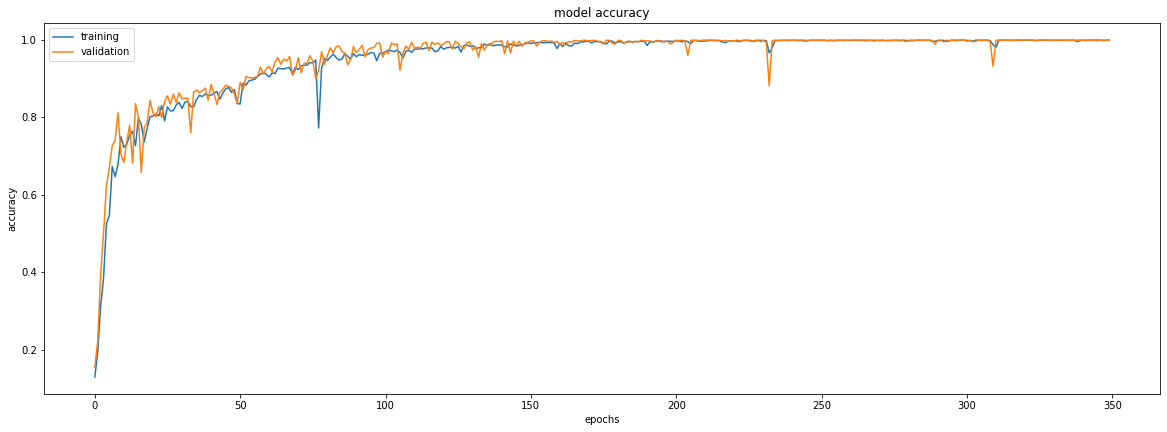

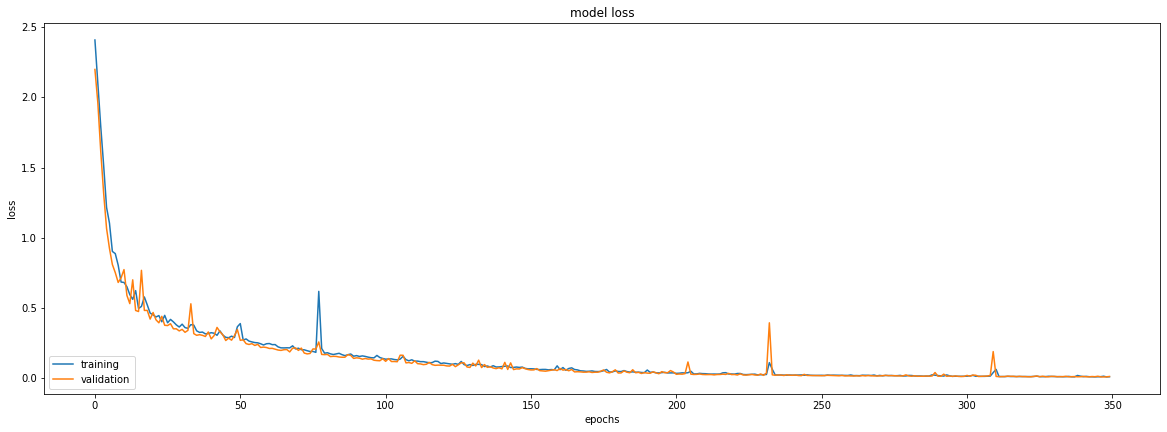

In [ ]:
# Plot Metrics
import matplotlib.pyplot as plt
plt.figure(figsize = (20,15))
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.figure(figsize = (20,15))
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['training', 'validation'], loc='lower left')
plt.show()

# Prepare test data

In [ ]:
# to predict: 

base_test_path = "master_thesis_dataset/testData/"

t_cols = [i for i in range(1, 12)]
tdf_2007_rt = pd.read_csv(base_test_path + '1020-07_10readings.csv', index_col=0, usecols=t_cols)
tdf_2010_rt = pd.read_csv(base_test_path + '1020-10_10readings.csv', index_col=0, usecols=t_cols)
tdf_2016_rt = pd.read_csv(base_test_path + '1020-16_10readings.csv', index_col=0, usecols=t_cols)
tdf_2017_rt = pd.read_csv(base_test_path + '1020-17_10readings.csv', index_col=0, usecols=t_cols)
tdf_2021_rt = pd.read_csv(base_test_path + '1020-21_10readings.csv', index_col=0, usecols=t_cols)
tdf_2103_rt = pd.read_csv(base_test_path + '1021-03_10readings.csv', index_col=0, usecols=t_cols)
tdf_2105_rt = pd.read_csv(base_test_path + '1021-05_10readings.csv', index_col=0, usecols=t_cols)
tdf_2115_rt = pd.read_csv(base_test_path + '1021-15_10readings.csv', index_col=0, usecols=t_cols)
tdf_2117_rt = pd.read_csv(base_test_path + '1021-17_10readings.csv', index_col=0, usecols=t_cols)
tdf_2008_rt = pd.read_csv(base_test_path + '1020-08_10readings.csv', index_col=0, usecols=t_cols)
tdf_2009_rt = pd.read_csv(base_test_path + '1020-09_10readings.csv', index_col=0, usecols=t_cols)

test_path_pressure = "master_thesis_dataset/pressureData/testData_pressure/"

# for 1bar :
tdf_2103_1bar = pd.read_csv(test_path_pressure + '1021-03_1bar_20readings.csv', index_col=0, usecols=t_cols) 
tdf_2105_1bar = pd.read_csv(test_path_pressure + '1021-05_1bar_20readings.csv', index_col=0, usecols=t_cols)
tdf_2115_1bar = pd.read_csv(test_path_pressure + '1021-15_1bar_20readings.csv', index_col=0, usecols=t_cols)
tdf_2117_1bar = pd.read_csv(test_path_pressure + '1021-17_1bar_20readings.csv', index_col=0, usecols=t_cols)
tdf_2007_1bar = pd.read_csv(test_path_pressure + '1020-07_1bar_20readings.csv', index_col=0, usecols=t_cols)
tdf_2010_1bar = pd.read_csv(test_path_pressure + '1020-10_1bar_20readings.csv', index_col=0, usecols=t_cols)
tdf_2016_1bar = pd.read_csv(test_path_pressure + '1020-16_1bar_20readings.csv', index_col=0, usecols=t_cols)
tdf_2017_1bar = pd.read_csv(test_path_pressure + '1020-17_1bar_20readings.csv', index_col=0, usecols=t_cols)
tdf_2021_1bar = pd.read_csv(test_path_pressure + '1020-21_1bar_20readings.csv', index_col=0, usecols=t_cols)
tdf_2008_1bar = pd.read_csv(test_path_pressure + '1020-08_1bar_20readings.csv', index_col=0, usecols=t_cols)
tdf_2009_1bar = pd.read_csv(test_path_pressure + '1020-09_1bar_20readings.csv', index_col=0, usecols=t_cols)

# for 2 bar :
tdf_2103_2bar = pd.read_csv(test_path_pressure + '1021-03_2bar_20readings.csv', index_col=0, usecols=t_cols) 
tdf_2105_2bar = pd.read_csv(test_path_pressure + '1021-05_2bar_20readings.csv', index_col=0, usecols=t_cols)
tdf_2115_2bar = pd.read_csv(test_path_pressure + '1021-15_2bar_20readings.csv', index_col=0, usecols=t_cols)
tdf_2117_2bar = pd.read_csv(test_path_pressure + '1021-17_2bar_20readings.csv', index_col=0, usecols=t_cols)
tdf_2007_2bar = pd.read_csv(test_path_pressure + '1020-07_2bar_20readings.csv', index_col=0, usecols=t_cols)
tdf_2010_2bar = pd.read_csv(test_path_pressure + '1020-10_2bar_20readings.csv', index_col=0, usecols=t_cols)
tdf_2016_2bar = pd.read_csv(test_path_pressure + '1020-16_2bar_20readings.csv', index_col=0, usecols=t_cols)
tdf_2017_2bar = pd.read_csv(test_path_pressure + '1020-17_2bar_20readings.csv', index_col=0, usecols=t_cols)
tdf_2021_2bar = pd.read_csv(test_path_pressure + '1020-21_2bar_20readings.csv', index_col=0, usecols=t_cols)
tdf_2008_2bar = pd.read_csv(test_path_pressure + '1020-08_2bar_20readings.csv', index_col=0, usecols=t_cols)
tdf_2009_2bar = pd.read_csv(test_path_pressure + '1020-09_2bar_20readings.csv', index_col=0, usecols=t_cols)

# for 3 bar :
tdf_2007_3bar = pd.read_csv(test_path_pressure + '1020-07_3bar_20readings.csv', index_col=0, usecols=t_cols)
tdf_2010_3bar = pd.read_csv(test_path_pressure + '1020-10_3bar_20readings.csv', index_col=0, usecols=t_cols)
tdf_2016_3bar = pd.read_csv(test_path_pressure + '1020-16_3bar_20readings.csv', index_col=0, usecols=t_cols)
tdf_2017_3bar = pd.read_csv(test_path_pressure + '1020-17_3bar_20readings.csv', index_col=0, usecols=t_cols)
tdf_2021_3bar = pd.read_csv(test_path_pressure + '1020-21_3bar_20readings.csv', index_col=0, usecols=t_cols)
tdf_2008_3bar = pd.read_csv(test_path_pressure + '1020-08_3bar_20readings.csv', index_col=0, usecols=t_cols)
tdf_2009_3bar = pd.read_csv(test_path_pressure + '1020-09_3bar_20readings.csv', index_col=0, usecols=t_cols)

# for 4 bar :
tdf_2103_4bar = pd.read_csv(test_path_pressure + '1021-03_4bar_20readings.csv', index_col=0, usecols=t_cols)
tdf_2105_4bar = pd.read_csv(test_path_pressure + '1021-05_4bar_20readings.csv', index_col=0, usecols=t_cols)
tdf_2115_4bar = pd.read_csv(test_path_pressure + '1021-15_4bar_20readings.csv', index_col=0, usecols=t_cols)
tdf_2117_4bar = pd.read_csv(test_path_pressure + '1021-17_4bar_20readings.csv', index_col=0, usecols=t_cols)
tdf_2007_4bar = pd.read_csv(test_path_pressure + '1020-07_4bar_20readings.csv', index_col=0, usecols=t_cols)
tdf_2010_4bar = pd.read_csv(test_path_pressure + '1020-10_4bar_20readings.csv', index_col=0, usecols=t_cols)
tdf_2016_4bar = pd.read_csv(test_path_pressure + '1020-16_4bar_20readings.csv', index_col=0, usecols=t_cols)
tdf_2017_4bar = pd.read_csv(test_path_pressure + '1020-17_4bar_20readings.csv', index_col=0, usecols=t_cols)
tdf_2021_4bar = pd.read_csv(test_path_pressure + '1020-21_4bar_20readings.csv', index_col=0, usecols=t_cols)
tdf_2008_4bar = pd.read_csv(test_path_pressure + '1020-08_4bar_20readings.csv', index_col=0, usecols=t_cols)
tdf_2009_4bar = pd.read_csv(test_path_pressure + '1020-09_4bar_20readings.csv', index_col=0, usecols=t_cols)

# for 6 bar :
tdf_2103_6bar = pd.read_csv(test_path_pressure + '1021-03_6bar_20readings.csv', index_col=0, usecols=t_cols) 
tdf_2105_6bar = pd.read_csv(test_path_pressure + '1021-05_6bar_20readings.csv', index_col=0, usecols=t_cols)
tdf_2115_6bar = pd.read_csv(test_path_pressure + '1021-15_6bar_20readings.csv', index_col=0, usecols=t_cols)
tdf_2117_6bar = pd.read_csv(test_path_pressure + '1021-17_6bar_20readings.csv', index_col=0, usecols=t_cols)

# Test data with window of inflection concept

In [ ]:
# preparing test data dictionary
testData_dict = {'2103': {'rt': tdf_2103_rt.values[790:1790]/15, 
                          '1bar': tdf_2103_1bar.values[790:1790]/15, 
                          '2bar': tdf_2103_2bar.values[790:1790]/15, 
                          '4bar': tdf_2103_4bar.values[790:1790]/15, 
                          '6bar': tdf_2103_6bar.values[790:1790]/15,
                          '05deg': (df_2103_05deg.values[790:1790]/15)[:, 80:],
                          '15deg': (df_2103_15deg.values[790:1790]/15)[:, 80:], 
                          '25deg': (df_2103_25deg.values[790:1790]/15)[:, 80:], 
                          '35deg': (df_2103_35deg.values[790:1790]/15)[:, 80:], 
                          '45deg': (df_2103_45deg.values[790:1790]/15)[:, 80:]},
                 '2105': {'rt': tdf_2105_rt.values[790:1790]/15, 
                          '1bar': tdf_2105_1bar.values[790:1790]/15, 
                          '2bar': tdf_2105_2bar.values[790:1790]/15, 
                          '4bar': tdf_2105_4bar.values[790:1790]/15, 
                          '6bar': tdf_2105_6bar.values[790:1790]/15,
                          '05deg': (df_2105_05deg.values[790:1790]/15)[:, 80:],
                          '15deg': (df_2105_15deg.values[790:1790]/15)[:, 80:], 
                          '25deg': (df_2105_25deg.values[790:1790]/15)[:, 80:], 
                          '35deg': (df_2105_35deg.values[790:1790]/15)[:, 80:], 
                          '45deg': (df_2105_45deg.values[790:1790]/15)[:, 80:]},
                 '2115': {'rt': tdf_2115_rt.values[790:1790]/15, 
                          '1bar': tdf_2115_1bar.values[790:1790]/15, 
                          '2bar': tdf_2115_2bar.values[790:1790]/15, 
                          '4bar': tdf_2115_4bar.values[790:1790]/15, 
                          '6bar': tdf_2115_6bar.values[790:1790]/15,
                          '05deg': (df_2115_05deg.values[790:1790]/15)[:, 80:],
                          '15deg': (df_2115_15deg.values[790:1790]/15)[:, 80:], 
                          '25deg': (df_2115_25deg.values[790:1790]/15)[:, 80:], 
                          '35deg': (df_2115_35deg.values[790:1790]/15)[:, 80:], 
                          '45deg': (df_2115_45deg.values[790:1790]/15)[:, 80:]},
                 '2117': {'rt': tdf_2117_rt.values[790:1790]/15, 
                          '1bar': tdf_2117_1bar.values[790:1790]/15, 
                          '2bar': tdf_2117_2bar.values[790:1790]/15, 
                          '4bar': tdf_2117_4bar.values[790:1790]/15, 
                          '6bar': tdf_2117_6bar.values[790:1790]/15,
                          '05deg': (df_2117_05deg.values[790:1790]/15)[:, 80:],
                          '15deg': (df_2117_15deg.values[790:1790]/15)[:, 80:], 
                          '25deg': (df_2117_25deg.values[790:1790]/15)[:, 80:], 
                          '35deg': (df_2117_35deg.values[790:1790]/15)[:, 80:], 
                          '45deg': (df_2117_45deg.values[790:1790]/15)[:, 80:]},
                 '2007': {'rt': tdf_2007_rt.values[790:1790]/15, 
                          '1bar': tdf_2007_1bar.values[790:1790]/15, 
                          '2bar': tdf_2007_2bar.values[790:1790]/15, 
                          '3bar': tdf_2007_3bar.values[790:1790]/15, 
                          '4bar': tdf_2007_4bar.values[790:1790]/15,
                          '05deg': (df_2007_05deg.values[790:1790]/15)[:, 80:],
                          '15deg': (df_2007_15deg.values[790:1790]/15)[:, 80:], 
                          '25deg': (df_2007_25deg.values[790:1790]/15)[:, 80:], 
                          '35deg': (df_2007_35deg.values[790:1790]/15)[:, 80:], 
                          '45deg': (df_2007_45deg.values[790:1790]/15)[:, 80:]},
                 '2010': {'rt': tdf_2010_rt.values[790:1790]/15, 
                          '1bar': tdf_2010_1bar.values[790:1790]/15, 
                          '2bar': tdf_2010_2bar.values[790:1790]/15, 
                          '3bar': tdf_2010_3bar.values[790:1790]/15, 
                          '4bar': tdf_2010_4bar.values[790:1790]/15,
                          '05deg': (df_2010_05deg.values[790:1790]/15)[:, 80:],
                          '15deg': (df_2010_15deg.values[790:1790]/15)[:, 80:], 
                          '25deg': (df_2010_25deg.values[790:1790]/15)[:, 80:], 
                          '35deg': (df_2010_35deg.values[790:1790]/15)[:, 80:], 
                          '45deg': (df_2010_45deg.values[790:1790]/15)[:, 80:]},
                 '2016': {'rt': tdf_2016_rt.values[790:1790]/15, 
                          '1bar': tdf_2016_1bar.values[790:1790]/15, 
                          '2bar': tdf_2016_2bar.values[790:1790]/15, 
                          '3bar': tdf_2016_3bar.values[790:1790]/15, 
                          '4bar': tdf_2016_4bar.values[790:1790]/15,
                          '05deg': (df_2016_05deg.values[790:1790]/15)[:, 80:],
                          '15deg': (df_2016_15deg.values[790:1790]/15)[:, 80:], 
                          '25deg': (df_2016_25deg.values[790:1790]/15)[:, 80:], 
                          '35deg': (df_2016_35deg.values[790:1790]/15)[:, 80:], 
                          '45deg': (df_2016_45deg.values[790:1790]/15)[:, 80:]},
                 '2017': {'rt': tdf_2017_rt.values[790:1790]/15, 
                          '1bar': tdf_2017_1bar.values[790:1790]/15, 
                          '2bar': tdf_2017_2bar.values[790:1790]/15, 
                          '3bar': tdf_2017_3bar.values[790:1790]/15, 
                          '4bar': tdf_2017_4bar.values[790:1790]/15,
                          '05deg': (df_2017_05deg.values[790:1790]/15)[:, 80:],
                          '15deg': (df_2017_15deg.values[790:1790]/15)[:, 80:], 
                          '25deg': (df_2017_25deg.values[790:1790]/15)[:, 80:], 
                          '35deg': (df_2017_35deg.values[790:1790]/15)[:, 80:], 
                          '45deg': (df_2017_45deg.values[790:1790]/15)[:, 80:]},
                 '2021': {'rt': tdf_2021_rt.values[790:1790]/15, 
                          '1bar': tdf_2021_1bar.values[790:1790]/15, 
                          '2bar': tdf_2021_2bar.values[790:1790]/15, 
                          '3bar': tdf_2021_3bar.values[790:1790]/15, 
                          '4bar': tdf_2021_4bar.values[790:1790]/15,
                          '05deg': (df_2021_05deg.values[790:1790]/15)[:, 80:],
                          '15deg': (df_2021_15deg.values[790:1790]/15)[:, 80:], 
                          '25deg': (df_2021_25deg.values[790:1790]/15)[:, 80:], 
                          '35deg': (df_2021_35deg.values[790:1790]/15)[:, 80:], 
                          '45deg': (df_2021_45deg.values[790:1790]/15)[:, 80:]},
                 '2008': {'rt': tdf_2008_rt.values[790:1790]/4, 
                          '1bar': tdf_2008_1bar.values[790:1790]/4, 
                          '2bar': tdf_2008_2bar.values[790:1790]/4, 
                          '3bar': tdf_2008_3bar.values[790:1790]/4, 
                          '4bar': tdf_2008_4bar.values[790:1790]/4,
                          '05deg': (df_2008_05deg.values[790:1790]/4)[:, 80:],
                          '15deg': (df_2008_15deg.values[790:1790]/4)[:, 80:], 
                          '25deg': (df_2008_25deg.values[790:1790]/4)[:, 80:], 
                          '35deg': (df_2008_35deg.values[790:1790]/4)[:, 80:], 
                          '45deg': (df_2008_45deg.values[790:1790]/4)[:, 80:]},
                 '2009': {'rt': tdf_2009_rt.values[790:1790]/4, 
                          '1bar': tdf_2009_1bar.values[790:1790]/4, 
                          '2bar': tdf_2009_2bar.values[790:1790]/4, 
                          '3bar': tdf_2009_3bar.values[790:1790]/4, 
                          '4bar': tdf_2009_4bar.values[790:1790]/4,
                          '05deg': (df_2009_05deg.values[790:1790]/4)[:, 80:],
                          '15deg': (df_2009_15deg.values[790:1790]/4)[:, 80:], 
                          '25deg': (df_2009_25deg.values[790:1790]/4)[:, 80:], 
                          '35deg': (df_2009_35deg.values[790:1790]/4)[:, 80:], 
                          '45deg': (df_2009_45deg.values[790:1790]/4)[:, 80:]}
                }

# Test data without window of inflection concept

In [ ]:
# preparing test data dictionary
testData_dict = {'2103': {'rt': tdf_2103_rt.values/15, 
                          '1bar': tdf_2103_1bar.values/15, 
                          '2bar': tdf_2103_2bar.values/15, 
                          '4bar': tdf_2103_4bar.values/15, 
                          '6bar': tdf_2103_6bar.values/15,
                          '05deg': (df_2103_05deg.values/15)[:, 80:],
                          '15deg': (df_2103_15deg.values/15)[:, 80:], 
                          '25deg': (df_2103_25deg.values/15)[:, 80:], 
                          '35deg': (df_2103_35deg.values/15)[:, 80:], 
                          '45deg': (df_2103_45deg.values/15)[:, 80:]},
                 '2105': {'rt': tdf_2105_rt.values/15, 
                          '1bar': tdf_2105_1bar.values/15, 
                          '2bar': tdf_2105_2bar.values/15, 
                          '4bar': tdf_2105_4bar.values/15, 
                          '6bar': tdf_2105_6bar.values/15,
                          '05deg': (df_2105_05deg.values/15)[:, 80:],
                          '15deg': (df_2105_15deg.values/15)[:, 80:], 
                          '25deg': (df_2105_25deg.values/15)[:, 80:], 
                          '35deg': (df_2105_35deg.values/15)[:, 80:], 
                          '45deg': (df_2105_45deg.values/15)[:, 80:]},
                 '2115': {'rt': tdf_2115_rt.values/15, 
                          '1bar': tdf_2115_1bar.values/15, 
                          '2bar': tdf_2115_2bar.values/15, 
                          '4bar': tdf_2115_4bar.values/15, 
                          '6bar': tdf_2115_6bar.values/15,
                          '05deg': (df_2115_05deg.values/15)[:, 80:],
                          '15deg': (df_2115_15deg.values/15)[:, 80:], 
                          '25deg': (df_2115_25deg.values/15)[:, 80:], 
                          '35deg': (df_2115_35deg.values/15)[:, 80:], 
                          '45deg': (df_2115_45deg.values/15)[:, 80:]},
                 '2117': {'rt': tdf_2117_rt.values/15, 
                          '1bar': tdf_2117_1bar.values/15, 
                          '2bar': tdf_2117_2bar.values/15, 
                          '4bar': tdf_2117_4bar.values/15, 
                          '6bar': tdf_2117_6bar.values/15,
                          '05deg': (df_2117_05deg.values/15)[:, 80:],
                          '15deg': (df_2117_15deg.values/15)[:, 80:], 
                          '25deg': (df_2117_25deg.values/15)[:, 80:], 
                          '35deg': (df_2117_35deg.values/15)[:, 80:], 
                          '45deg': (df_2117_45deg.values/15)[:, 80:]},
                 '2007': {'rt': tdf_2007_rt.values/15, 
                          '1bar': tdf_2007_1bar.values/15, 
                          '2bar': tdf_2007_2bar.values/15, 
                          '3bar': tdf_2007_3bar.values/15, 
                          '4bar': tdf_2007_4bar.values/15,
                          '05deg': (df_2007_05deg.values/15)[:, 80:],
                          '15deg': (df_2007_15deg.values/15)[:, 80:], 
                          '25deg': (df_2007_25deg.values/15)[:, 80:], 
                          '35deg': (df_2007_35deg.values/15)[:, 80:], 
                          '45deg': (df_2007_45deg.values/15)[:, 80:]},
                 '2010': {'rt': tdf_2010_rt.values/15, 
                          '1bar': tdf_2010_1bar.values/15, 
                          '2bar': tdf_2010_2bar.values/15, 
                          '3bar': tdf_2010_3bar.values/15, 
                          '4bar': tdf_2010_4bar.values/15,
                          '05deg': (df_2010_05deg.values/15)[:, 80:],
                          '15deg': (df_2010_15deg.values/15)[:, 80:], 
                          '25deg': (df_2010_25deg.values/15)[:, 80:], 
                          '35deg': (df_2010_35deg.values/15)[:, 80:], 
                          '45deg': (df_2010_45deg.values/15)[:, 80:]},
                 '2016': {'rt': tdf_2016_rt.values/15, 
                          '1bar': tdf_2016_1bar.values/15, 
                          '2bar': tdf_2016_2bar.values/15, 
                          '3bar': tdf_2016_3bar.values/15, 
                          '4bar': tdf_2016_4bar.values/15,
                          '05deg': (df_2016_05deg.values/15)[:, 80:],
                          '15deg': (df_2016_15deg.values/15)[:, 80:], 
                          '25deg': (df_2016_25deg.values/15)[:, 80:], 
                          '35deg': (df_2016_35deg.values/15)[:, 80:], 
                          '45deg': (df_2016_45deg.values/15)[:, 80:]},
                 '2017': {'rt': tdf_2017_rt.values/15, 
                          '1bar': tdf_2017_1bar.values/15, 
                          '2bar': tdf_2017_2bar.values/15, 
                          '3bar': tdf_2017_3bar.values/15, 
                          '4bar': tdf_2017_4bar.values/15,
                          '05deg': (df_2017_05deg.values/15)[:, 80:],
                          '15deg': (df_2017_15deg.values/15)[:, 80:], 
                          '25deg': (df_2017_25deg.values/15)[:, 80:], 
                          '35deg': (df_2017_35deg.values/15)[:, 80:], 
                          '45deg': (df_2017_45deg.values/15)[:, 80:]},
                 '2021': {'rt': tdf_2021_rt.values/15, 
                          '1bar': tdf_2021_1bar.values/15, 
                          '2bar': tdf_2021_2bar.values/15, 
                          '3bar': tdf_2021_3bar.values/15, 
                          '4bar': tdf_2021_4bar.values/15,
                          '05deg': (df_2021_05deg.values/15)[:, 80:],
                          '15deg': (df_2021_15deg.values/15)[:, 80:], 
                          '25deg': (df_2021_25deg.values/15)[:, 80:], 
                          '35deg': (df_2021_35deg.values/15)[:, 80:], 
                          '45deg': (df_2021_45deg.values/15)[:, 80:]},
                 '2008': {'rt': tdf_2008_rt.values/4, 
                          '1bar': tdf_2008_1bar.values/4, 
                          '2bar': tdf_2008_2bar.values/4, 
                          '3bar': tdf_2008_3bar.values/4, 
                          '4bar': tdf_2008_4bar.values/4,
                          '05deg': (df_2008_05deg.values/4)[:, 80:],
                          '15deg': (df_2008_15deg.values/4)[:, 80:], 
                          '25deg': (df_2008_25deg.values/4)[:, 80:], 
                          '35deg': (df_2008_35deg.values/4)[:, 80:], 
                          '45deg': (df_2008_45deg.values/4)[:, 80:]},
                 '2009': {'rt': tdf_2009_rt.values/4, 
                          '1bar': tdf_2009_1bar.values/4, 
                          '2bar': tdf_2009_2bar.values/4, 
                          '3bar': tdf_2009_3bar.values/4, 
                          '4bar': tdf_2009_4bar.values/4,
                          '05deg': (df_2009_05deg.values/4)[:, 80:],
                          '15deg': (df_2009_15deg.values/4)[:, 80:], 
                          '25deg': (df_2009_25deg.values/4)[:, 80:], 
                          '35deg': (df_2009_35deg.values/4)[:, 80:], 
                          '45deg': (df_2009_45deg.values/4)[:, 80:]}
                }

# Continued test data preparation

In [ ]:
test_data = []
test_labels = []
test_param_press = []
test_param_temp = []
for i in range(0, 10):
    for valve in testData_dict.keys():
        for param in testData_dict[valve].keys():
            test_data.append(testData_dict[valve][param][:,i])
            test_labels.append(label_dict[valve])
            if 'bar' in param:
                tp_str = param.split('b')[0]
                test_param_press.append(int(tp_str))
                test_param_temp.append(22)
            elif 'deg' in param:
                tt_str = param.split('d')[0]
                test_param_press.append(1.01)
                test_param_temp.append(int(tt_str))
            else:
                test_param_press.append(1.01)
                test_param_temp.append(22)

In [ ]:
X_test = np.array(test_data, dtype='float')
y_test = np.array(test_labels)
y_test_categorical = to_categorical(y_test, num_classes=11)

test_param_press = np.array(test_param_press)
test_param_press = np.reshape(test_param_press, (test_param_press.shape[0], 1))
test_param_temp = np.array(test_param_temp)
test_param_temp = np.reshape(test_param_temp, (test_param_temp.shape[0], 1))

# Evaluate and predict

In [ ]:
results = model.evaluate(x=[X_test, test_param_press, test_param_temp], y=y_test_categorical, batch_size=32)
print('test loss, test accuracy:', results)

predictions = model.predict(x=[X_test, test_param_press, test_param_temp])
print('predictions shape:', predictions.shape)

1100/1100 [==============================] - 0s 75us/sample - loss: 0.4601 - acc: 0.9218
test loss, test accuracy: [0.4601042684912682, 0.9218182]
predictions shape: (1100, 11)


In [ ]:
class_labels = np.argmax(predictions, axis=1)
class_labels

array([ 0,  0,  0, ..., 10, 10, 10])

# Plot confusion matrix

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig = plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=class_labels, labels=[0,1,2,3,4,5,6,7,8,9,10])

Confusion matrix, without normalization
[[100   0   0   0   0   0   0   0   0   0   0]
 [  0 100   0   0   0   0   0   0   0   0   0]
 [  0   0 100   0   0   0   0   0   0   0   0]
 [  0   0   0 100   0   0   0   0   0   0   0]
 [  0   0   0   0  99   0   0   0   1   0   0]
 [  0   0   0   0   0  61  26   0  13   0   0]
 [  0   0   0   0   0   0  68   0  32   0   0]
 [  0   0   0   0   0   0   0 100   0   0   0]
 [  0   0   0   0   0   0   0   0 100   0   0]
 [  0   0   0   6   0   0   0   0   0  86   8]
 [  0   0   0   0   0   0   0   0   0   0 100]]


<Figure size 432x288 with 0 Axes>

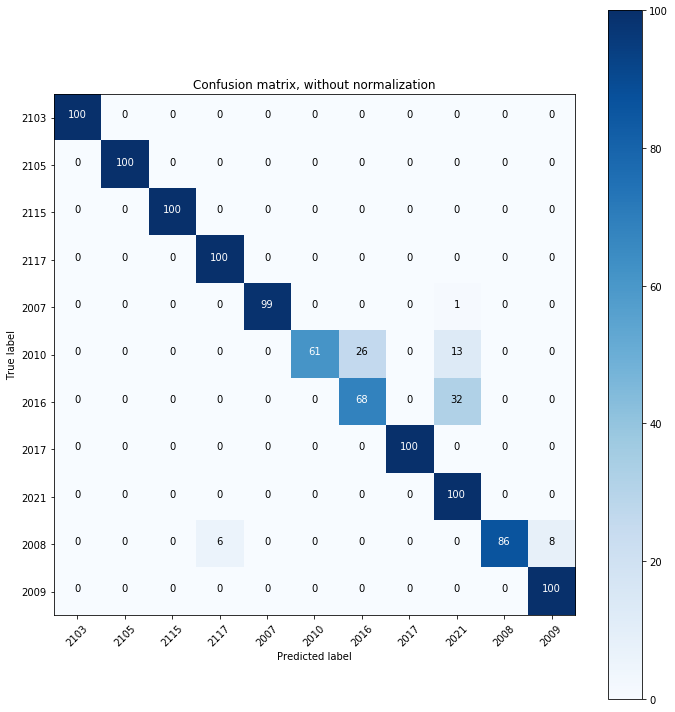

In [ ]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf_matrix, classes=['2103', '2105', '2115', '2117', 
                                            '2007', '2010', '2016', '2017', 
                                            '2021', '2008', '2009'],
                      title='Confusion matrix, without normalization')

# Save model and other results

In [ ]:
# To save a model (model's architecture, weights, and training configuration stored in a file/folder)
model.save('mlp/mlp_withWindow_noNoise_multioutput')

In [ ]:
# to save loss and acc matrices to plot later
import pickle
with open('mlp/mlp_withWindow_noNoise_multioutput_metrics.pickle', 'wb') as handle:
    pickle.dump(history.history, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# to save confusion matrix:
with open('mlp/mlp_withWindow_noNoise_multioutput_confMatrix11.pickle', 'wb') as f:
    pickle.dump(conf_matrix, f, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# to zip saved model and pickle files
!zip -r /content/mlp.zip /content/mlp

  adding: content/mlp/ (stored 0%)
  adding: content/mlp/mlp_noWindow_withNoise_multioutput_confMatrix2.pickle (deflated 25%)
  adding: content/mlp/mlp_withWindow_withNoise_multioutput_confMatrix2.pickle (deflated 25%)
  adding: content/mlp/mlp_noWindow_withNoise_multioutput_confMatrix11.pickle (deflated 83%)
  adding: content/mlp/mlp_withWindow_noNoise_multioutput_metrics.pickle (deflated 77%)
  adding: content/mlp/mlp_noWindow_noNoise_multioutput_metrics.pickle (deflated 77%)
  adding: content/mlp/mlp_withWindow_noNoise_multioutput_confMatrix11.pickle (deflated 84%)
  adding: content/mlp/mlp_noWindow_withNoise_multioutput (deflated 40%)
  adding: content/mlp/mlp_noWindow_withNoise_multioutput_metrics.pickle (deflated 77%)
  adding: content/mlp/mlp_withWindow_withNoise_multioutput_confMatrix11.pickle (deflated 84%)
  adding: content/mlp/mlp_withWindow_noNoise_multioutput_confMatrix2.pickle (deflated 25%)
  adding: content/mlp/mlp_noWindow_noNoise_multioutput_confMatrix2.pickle (deflat

In [ ]:
# to download the zipped files
from google.colab import files
files.download("/content/mlp.zip")

# Load saved model and predict
check if you get same values

In [ ]:
loaded_model = tf.keras.models.load_model('mlp/mlp_noWindow_noNoise')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [ ]:
results = loaded_model.evaluate(x=[X_test, test_param_press, test_param_temp], y=y_test_categorical, batch_size=32)
print('test loss, test accuracy:', results)

predictions = loaded_model.predict(x=[X_test, test_param_press, test_param_temp])
print('predictions shape:', predictions.shape)

1100/1100 [==============================] - 0s 285us/sample - loss: 0.3890 - acc: 0.9355
test loss, test accuracy: [0.38903635516762736, 0.93545455]
predictions shape: (1100, 11)
